In [59]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [60]:
### Config
tweetPath = '/content/gdrive/MyDrive/interIIT/dev_data_tweet.xlsx'
articlePath ='/content/gdrive/MyDrive/interIIT/dev_data_article.xlsx' 

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot

In [62]:
tweets = pd.read_excel(tweetPath)
tweets.describe()

,Mobile_Tech_Tag
count,4000.000000
mean,0.250000
std,0.433067
min,0.000000
25%,0.000000
50%,0.000000
75%,0.250000
max,1.000000


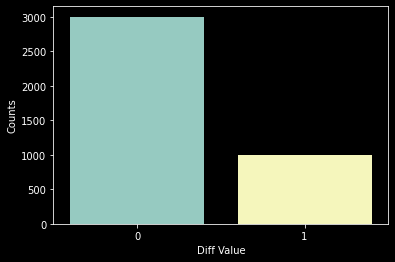

In [63]:
plt.style.use('dark_background')
sns.countplot(x='Mobile_Tech_Tag',data=tweets)
plt.xlabel('Diff Value')
plt.ylabel('Counts')
plt.show()

In [64]:
tweets['Mobile_Tech_Tag'].value_counts()

0    3000
1    1000
Name: Mobile_Tech_Tag, dtype: int64

### Example Tweets


In [65]:
hveMobile = tweets[tweets['Mobile_Tech_Tag'] == 1]
for i in range(10):
  print(hveMobile.iloc[i,1])

#Samsung is now making another addition into it's A series, and the word is out that it's upcoming variant Galaxy A72 4G has awesome battery and charger with brilliant specs . . . For more tech updates Follow 👉 @MobileNerve . . . #smartphone #mobile #mobilephone #mobilephoto https://t.co/b8UO2Z6mC4
QT @AwamiWeb: Want my hands on #GalaxyS21 🥺 ; The Samsung #GalaxyS21 Ultra 5G is the most premium Smartphone yet, with a strong focus on cameras. https://t.co/TxP2YscKMZ
QT @AwamiWeb: This is a next level camera 🤩 #GalaxyS21 ; The Samsung #GalaxyS21 Ultra 5G is the most premium Smartphone yet, with a strong focus on cameras. https://t.co/TxP2YscKMZ
Trick to get Google Home Mini at 499 Only Without Timesprime Coupon. 1. First Of All Just Open Google Assistant In your Android Smartphone. 2. Google Assistant Will Open & Now Speak “Ok Google, Play Google Home Mini Game“ 3. Google Will Show You Game Page Like Below With… https://t.co/I85qEBA3bK
QT @MadhavSheth1: We are the pioneers of 64MP Smartp

In [66]:
hveMobile

,Tweet_ID,Tweet,Mobile_Tech_Tag
3000,tweet_3001,#Samsung is now making another addition into i...,1
3001,tweet_3002,QT @AwamiWeb: Want my hands on #GalaxyS21 🥺 ; ...,1
3002,tweet_3003,QT @AwamiWeb: This is a next level camera 🤩 #G...,1
3003,tweet_3004,Trick to get Google Home Mini at 499 Only With...,1
3004,tweet_3005,QT @MadhavSheth1: We are the pioneers of 64MP ...,1
...,...,...,...
3995,tweet_3996,RT @ZeeNews: चीनी मोबाइल कंपनी रियलमी ने अपना ...,1
3996,tweet_3997,RT @ZeeNews: चीनी मोबाइल कंपनी रियलमी ने अपना ...,1
3997,tweet_3998,चीनी मोबाइल कंपनी रियलमी ने अपना Realme V15 5G...,1
3998,tweet_3999,QT @AnjaliSingh_IN: Aapne phone hi galat choos...,1


### Hindi Tweets

In [67]:
for i in range(30):
  print(hveMobile.iloc[i + 969,1])

#Samsung कंपनी जल्द लॉन्च करने वाली है अपना नया मोबाइल फोन GalaxyA52 5G @SamsungMobile #smartphone https://t.co/6ebGSUOrc7
साल 2021 में ये 5G Smartphone मचा रहे हैं धूम, जानें कीमत और फीचर्स https://t.co/lt4jUzcVDJ
भारत में लॉन्च : Vivo Y51A ट्रिपल रियर कैमरा, स्नैपड्रैगन 662 SoC जाने कीमत, स्पेसिफिकेशन #smartphone #vivo #NewsUpdate https://t.co/DaHnxtF3rU
Why #OnePlus smartphone have low quality Camera वन प्लस फ़ोन का कैमरा बेक... https://t.co/cxkjS4ViSP via @YouTube
@XiaomiIndia @amazonIN 15k MP camera laga kr kahanj khatam kro na. Yeh kya dheere dheere increase kiye jaa rhe ho. Ya alag se ek dslr free kr do smartphone k saath. Wese smartphone to choda nhi hai, bus cameras launch hue jaa rhe hai
Oppo Reno 5 Pro 5G को 18 जनवरी 2021 को दोपहर 12:30 बजे लॉन्च किया जाएगा #oppo#smartphone #opporeno5pro5g#launching18thjan2021 https://t.co/pRJpuQZRXL
@TechnicalGuruji Guruji Budget 5G smartphones kab aayenge ab bas aap se milna hai Love from Delhi #BoloGuruji
@MadhavSheth1 Please, Don't use o

### Hindi texts to English

In [ ]:
----------
----------

## Text Preprocessing

In [68]:
word = ['QT','RT']

In [69]:
import re
import string
def preprocessingText(text):
  text = re.sub(r'http\S+', '',text)
  text = re.sub(r'\s([@][\w_-]+)', '', text).strip()
  text = ''.join([i for i in text if i not in string.punctuation])
  text = ' '.join([i for i in text.split() if i not in word]).strip()
  return text
X = hveMobile.iloc[2,1]
print('Original text :', X)
print('Processed Word :', preprocessingText(X))

Original text : QT @AwamiWeb: This is a next level camera 🤩 #GalaxyS21 ; The Samsung #GalaxyS21 Ultra 5G is the most premium Smartphone yet, with a strong focus on cameras. https://t.co/TxP2YscKMZ
Processed Word : This is a next level camera 🤩 GalaxyS21 The Samsung GalaxyS21 Ultra 5G is the most premium Smartphone yet with a strong focus on cameras


In [70]:
### Word Distribution
tweets['Tweet'] = tweets['Tweet'].apply(lambda x : preprocessingText(x))

In [71]:
tweets.head()

,Tweet_ID,Tweet,Mobile_Tech_Tag
0,tweet_0001,Youll 💜 my PitchWars book if you like 🦋 hateto...,0
1,tweet_0002,🚨 Breaking WBA have reached a verbal agreement...,0
2,tweet_0003,really says a lot about society that we are ha...,0
3,tweet_0004,HPV vaccines increased serious nervous system ...,0
4,tweet_0005,Ramaphosa says if you are positive you must se...,0


In [72]:
tweets['num_of_word'] = tweets['Tweet'].apply(lambda x : len(str(x).split()))

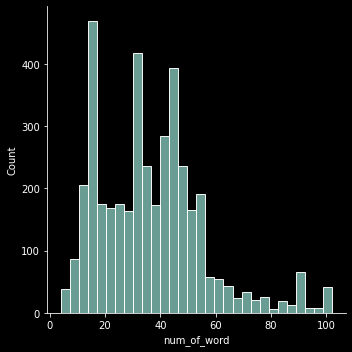

In [73]:
sns.displot(data=tweets,x='num_of_word')
plt.show()

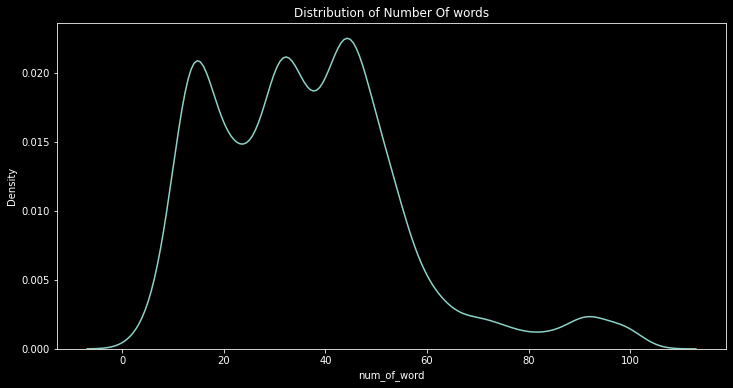

In [74]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(tweets['num_of_word']).set_title('Distribution of Number Of words')

In [55]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [75]:
def remove_stopword(x):
    return [y for y in x.split() if y not in stopwords.words('english')]
tweets['Tweet'] = tweets['Tweet'].apply(lambda x:remove_stopword(x))

In [76]:
from collections import Counter
tweets['temp_list'] = tweets['Tweet'].apply(lambda x:str(x).split())
top = Counter([item for sublist in tweets['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,"'loan',",1213
1,"'के',",1119
2,"'पर',",1017
3,"'risk',",931
4,"'hai',",780
5,"'है',",626
6,"'की',",599
7,"'से',",568
8,"'लिए',",536
9,"'का',",501


In [78]:
tweets.drop('temp_list',axis=1,inplace=True)